In [1]:
#Import packages

import pandas as pd
import numpy as np
from googletrans import Translator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#Read in .csv
data = pd.read_csv('translated_data.csv')
data = pd.DataFrame(data)

## Exploring the data

In [3]:
#Overview of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1917 non-null   int64 
 1   name            1917 non-null   object
 2   price           1917 non-null   object
 3   location        1917 non-null   object
 4   offerer         1917 non-null   object
 5   link            1917 non-null   object
 6   id              1917 non-null   int64 
 7   img_url         1665 non-null   object
 8   listing_url     1917 non-null   object
 9   description     1917 non-null   object
 10  year            1917 non-null   int64 
 11  manufacturer    1917 non-null   object
 12  model           1909 non-null   object
 13  class           1917 non-null   object
 14  length          1917 non-null   object
 15  fuel            1797 non-null   object
 16  hull_material   1917 non-null   object
 17  hull_shape      421 non-null    object
 18  hull_id_

In [4]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916
name,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,1979 Dufour 28001979 Dufour 2800,2010 Van der Graaf Classic Schooner2010 Van de...,2010 Custom Van Der Graaf BV Schooner2010 Cust...,2008 Custom Build Gulet2008 Custom Build Gulet,2025 Sunreef 1402025 Sunreef 140,2015 Bodrum Custom2015 Bodrum Custom,1986 Fjellstrand DSC Passenger Catamaran1986 F...,1911 William Fife & Sons 38Meter1911 William F...,2007 Schooner Eldorado2007 Schooner Eldorado,...,1965 Flying Junior1965 Flying Junior,2021 unbekannt 12-fuß-dinghy2021 unbekannt 12-...,2010 Teja wooden Boats 12-Fuß Dingi -VERKAUFT-...,1850 Topper 3401850 Topper 340,2022 MiniCat 310 Sport2022 MiniCat 310 Sport,2022 MiniCat GUPPY2022 MiniCat GUPPY,2022 Williams Jet Tenders Ersatzschlauch2022 W...,2014 Bic Open Bic2014 Bic Open Bic,1986 Sailboat Zuanelli 25 1986 Sailboat Zuanel...,1850 Botenkar Incl. 17 Stallingsbokken1850 Bot...
price,24.500 €,9.900 €,12.000.000 €,12.000.000 €,5.000.000 €,Preis auf Anfrage,7.950.000 €,987.000 €,3.500.000 €,1.300.000 €,...,950 €,12.500 €,9.900 €,25 €,4.520 €,3.200 €,3.600 €,3.099 €,7.000 €,2.500 €
location,"Dinteloord, Niederlande","Greifswald, Deutschland","Contact De Valk Antibes, Frankreich","IMPERIA, Italien",Türkei,"Gdansk, Polen","Sud de la france, Frankreich","Contact De Valk Corfu, Griechenland","London, Greater London","Contact De Valk Amsterdam, Deutschland",...,Niederlande,"Augsburg, Deutschland","Alster, Deutschland","Dinteloord (NL), Niederlande",Deutschland,Deutschland,"Worms , Rhineland-Palatinate","Edersee, Hesse",Italien,"Dinteloord (NL), Niederlande"
offerer,Sealion Yachts,Privater Verkäufer,De Valk Group B.V,Bernard Gallay Yacht Brokerage,Gino Group,S6 Marine,SARL YACHTSIDE MONACO,De Valk Group B.V,Boats & Barcos Mediterráneos SL,De Valk Group B.V,...,Jachtbemiddeling Sneekerhof,Privater Verkäufer,Nordic Yachting e.K.,Bootveiling.com,Steinkämper GbR,Steinkämper GbR,Allegro Handels GmbH,Ship-Shop Rehbach-Edersee,Pollini Nautica,Bootveiling.com
link,/boot/1976-ketch-baarda-zeegrundel-8222682/,/boot/1979-dufour-2800-8457402/,/boot/2010-van-der-graaf-classic-schooner-7936...,/boot/2010-custom-van-der-graaf-bv-schooner-67...,/boot/2008-custom-build-gulet-469955/,/boot/2025-sunreef-140-8164809/,/boot/2015-bodrum-custom-8404683/,/boot/1986-fjellstrand-dsc-passenger-catamaran...,/boot/1911-william-fife-$-sons-38meter-6081675/,/boot/2007-schooner-eldorado-7936739/,...,/boot/1965-flying-junior-8121036/,/boot/2021-unbekannt-12--fu---dinghy-8431689/,/boot/2010-teja-wooden-boats-12--fu-dingi---ve...,/boot/1850-topper-340-8507924/,/boot/2022-minicat-310-sport-8412712/,/boot/2022-minicat-guppy-8412713/,/boot/2022-williams-jet-tenders-ersatzschlauch...,/boot/2014-bic-open-bic-8398460/,/boot/1986-sailboat-zuanelli-25-7391596/,/boot/1850-botenkar-incl.-17-stallingsbokken-8...
id,8222682,8457402,7936534,6751543,469955,8164809,8404683,7937781,6081675,7936739,...,8121036,8431689,8416222,8507924,8412712,8412713,8483214,8398460,7391596,8505216
img_url,https://images.boatsgroup.com/resize/1/26/82/8...,NaN,NaN,https://images.boatsgroup.com/resize/1/15/43/6...,https://images.boatsgroup.com/resize/1/99/55/4...,https://images.boatsgroup.com/resize/1/48/9/81...,https://images.boatsgroup.com/resize/1/46/83/8...,https://images.boatsgroup.com/resize/1/77/81/7...,https://images.boatsgroup.com/resize/1/16/75/6...,https://images.boatsgroup.com/resize/1/67/39/7...,...,https://images.boatsgroup.com/resize/1/10/36/8...,NaN,https://images.boatsgroup.com/resize/1/62/22/8...,https://images.boatsgroup.com/resize/1/79/24/8...,https://images.boatsgroup.com/resize/1/27/12/8...,https://images.boatsgroup.com/resize/1/27/13/8...,https://images.boatsgroup.com/resize/1/32/14/8...,https://images.boatsgroup.com/resize/1/84/60/8...,https://images.boatsgroup.com/resize/1/15/96/7...,https://images.boatsgroup.com/resize/1/52/1

In [5]:
#Look at first few rows
data.head()

,Unnamed: 0,name,price,location,offerer,link,id,img_url,listing_url,description,year,manufacturer,model,class,length,fuel,hull_material,hull_shape,hull_id_number,hull_warranty
0,0,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,24.500 €,"Dinteloord, Niederlande",Sealion Yachts,/boot/1976-ketch-baarda-zeegrundel-8222682/,8222682,https://images.boatsgroup.com/resize/1/26/82/8...,https://www.boot24.com/boot/1976-ketch-baarda-...,Algemeen: De Zeegrundel is een oorspronkelijk ...,1976,Ketch,Baarda Zeegrundel,barge sail boat,900m,diesel,steel,NaN,NaN,NaN
1,1,1979 Dufour 28001979 Dufour 2800,9.900 €,"Greifswald, Deutschland",Privater Verkäufer,/boot/1979-dufour-2800-8457402/,8457402,NaN,https://www.boot24.com/boot/1979-dufour-2800-8...,Verkaufe eine gut erhaltene und ausgestattete ...,1979,Dufour,2800,sailing boats with cabin,83m,diesel,gfk / fiberglass / polyester,NaN,NaN,NaN
2,2,2010 Van der Graaf Classic Schooner2010 Van de...,12.000.000 €,"Contact De Valk Antibes, Frankreich",De Valk Group B.V,/boot/2010-van-der-graaf-classic-schooner-7936...,7936534,NaN,https://www.boot24.com/boot/2010-van-der-graaf...,Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...,2010,Van der Graaf,Classic Schooner,sloop boats,"65,84m",diesel,steel,NaN,NaN,NaN
3,3,2010 Custom Van Der Graaf BV Schooner2010 Cust...,12.000.000 €,"IMPERIA, Italien",Bernard Gallay Yacht Brokerage,/boot/2010-custom-van-der-graaf-bv-schooner-67...,6751543,https://images.boatsgroup.com/resize/1/15/43/6...,https://www.boot24.com/boot/2010-custom-van-de...,Price On Application\n \nThe current ATLANTIC ...,2010,Custom,Van Der Graaf BV Schooner,cleaner,"64,50m",diesel,steel,NaN,NaN,NaN
4,4,2008 Custom Build Gulet2008 Custom Build Gulet,5.000.000 €,Türkei,Gino Group,/boot/2008-custom-build-gulet-469955/,469955,https://images.boatsgroup.com/resize/1/99/55/4...,https://www.boot24.com/boot/2008-custom-build-...,A beautiful 43m Gulet classic luxury style bui...,2008,Custom Build,Gulet,sailing yachts,"42,98m",diesel,wood,NaN,NaN,NaN


In [6]:
#Check out columns
data.columns

Index(['Unnamed: 0', 'name', 'price', 'location', 'offerer', 'link', 'id',
       'img_url', 'listing_url', 'description', 'year', 'manufacturer',
       'model', 'class', 'length', 'fuel', 'hull_material', 'hull_shape',
       'hull_id_number', 'hull_warranty'],
      dtype='object')

In [7]:
#Check missing values by column
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
hull_warranty,1891,98.643714
hull_id_number,1790,93.375065
hull_shape,1496,78.038602
img_url,252,13.145540
fuel,120,6.259781
model,8,0.417319
manufacturer,0,0.000000
hull_material,0,0.000000
length,0,0.000000
class,0,0.000000


In [8]:
#Overview of unique hull_warranty
unique_warranty = data['hull_warranty'].unique()
print(unique_warranty)

[nan '2 Jahre' '3 Jahre' '5 Jahre' '7 Jahre']


In [9]:
#Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0','link', 'id','img_url','hull_id_number','hull_warranty'])

## Let's focus on price first

In [10]:
data['price'].head()

0        24.500 €
1         9.900 €
2    12.000.000 €
3    12.000.000 €
4     5.000.000 €
Name: price, dtype: object

In [11]:
#Overview of unique prices
unique_price = data['price'].unique()
unique_price

array(['24.500 €', '9.900 €', '12.000.000 €', '5.000.000 €',
       'Preis auf Anfrage', '7.950.000 €', '987.000 €', '3.500.000 €',
       '1.300.000 €', '500.000 €', '3.000.000 €', '2.800.000 €',
       '2.600.000 €', '1.250.000 €', '199.500 €', '2.500.000 €',
       '4.000.000 €', '2.890.000 €', '700.000 €', '650.000 €',
       '2.650.000 €', '1.350.000 €', '1.600.000 €', '2.145.000 €',
       '1.200.000 €', '2.000.000 €', '1.900.000 €', '1.450.000 €',
       '1.000.000 €', '3.600.000 €', '950.000 €', '275.000 €',
       '450.000 €', '390.000 €', '75.000 €', '990.000 €', '5.800.000 €',
       '900.000 €', '2.900.000 €', '590.000 €', '350.000 €', '740.000 €',
       '995.000 €', '449.000 €', '705.000 €', '925.000 €', '380.000 €',
       '37.000 €', '750.000 €', '850.000 €', '1.090.000 €', '1.990.000 €',
       '550.000 €', '437.000 €', '1.490.000 €', '749.000 €', '579.000 €',
       '1.530.083 €', '1.500.000 €', '1.320.000 €', '145.000 €',
       '1.850.000 €', '690.000 €', '1.299.000

In [12]:
#Drop symbols in price column
data['price'] = data['price'].str.replace(' €', '')
data['price'] = data['price'].apply(lambda x: x.replace('.', ''))

#Drop "PreisaufAnfrage" from price column
data['price'] = data['price'].str.replace('Preis auf Anfrage', '')

#Convert price column to numeric 
#data['price'] = pd.to_numeric(raw_data['price'])

#Check type of price column
data['price'].dtype

#Check first few rows of price column
data['price'].head()

0       24500
1        9900
2    12000000
3    12000000
4     5000000
Name: price, dtype: object

In [13]:
unique_price = data['price'].unique()
unique_price

array(['24500', '9900', '12000000', '5000000', '', '7950000', '987000',
       '3500000', '1300000', '500000', '3000000', '2800000', '2600000',
       '1250000', '199500', '2500000', '4000000', '2890000', '700000',
       '650000', '2650000', '1350000', '1600000', '2145000', '1200000',
       '2000000', '1900000', '1450000', '1000000', '3600000', '950000',
       '275000', '450000', '390000', '75000', '990000', '5800000',
       '900000', '2900000', '590000', '350000', '740000', '995000',
       '449000', '705000', '925000', '380000', '37000', '750000',
       '850000', '1090000', '1990000', '550000', '437000', '1490000',
       '749000', '579000', '1530083', '1500000', '1320000', '145000',
       '1850000', '690000', '1299000', '465000', '2700000', '660450',
       '1100000', '230075', '395000', '320000', '992000', '470000',
       '389000', '1290000', '606933', '670000', '1240000', '168000',
       '175000', '1215000', '460000', '185000', '689000', '154000',
       '170000', '780000'

In [14]:
#Convert price to number
data['price'] = data['price'].astype(str)
data['price'] = pd.to_numeric(data['price'].str.strip(), errors='coerce')
data['price'] = data['price'].fillna(0).astype(int)
data['price']

0          24500
1           9900
2       12000000
3       12000000
4        5000000
          ...   
1912        3200
1913        3600
1914        3099
1915        7000
1916        2500
Name: price, Length: 1917, dtype: int64

In [15]:
#Convert price from euro to US dollar
exchange_rate = 1.09
data['price'] = data['price'] * exchange_rate
data['price'] = data['price'].fillna(0).astype(int)

In [16]:
data.rename(columns={'price':'price_usd'}, inplace=True)

In [17]:
data['price_usd']

0          26705
1          10791
2       13080000
3       13080000
4        5450000
          ...   
1912        3488
1913        3924
1914        3377
1915        7630
1916        2725
Name: price_usd, Length: 1917, dtype: int64

In [47]:
#Check out averages
data['price_usd'].describe().round(2)

count       1882.00
mean      214185.22
std       372194.17
min            0.00
25%        38041.00
50%        93740.00
75%       244986.00
max      6322000.00
Name: price_usd, dtype: float64

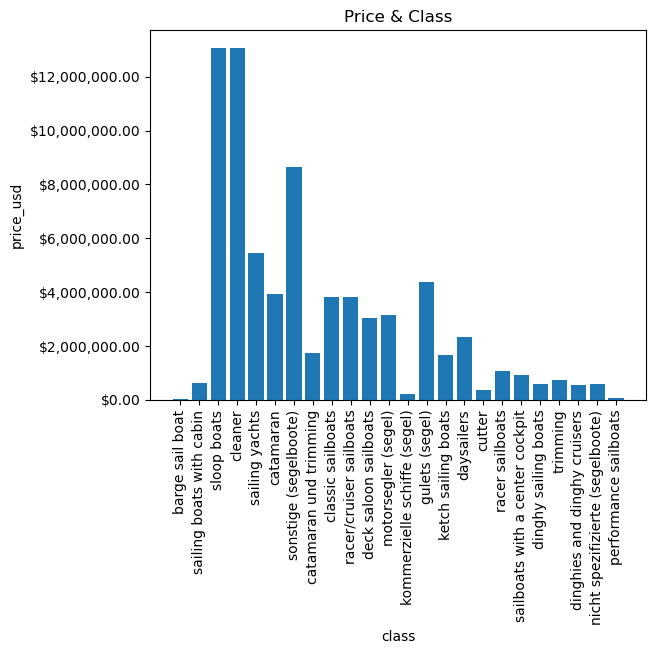

In [19]:
# plot a bar chart of the class column
#plt.bar(raw_data['class'], data['price_usd'])

# add title and labels
#plt.title('Price & Class')
#plt.xlabel('class')
#plt.ylabel('price_usd')
#plt.xticks(rotation=90)

# show the plot
#plt.show()

#plot a bar chart of the class column
x = data['class']
y = data['price_usd']

# create a bar chart of the data
fig, ax = plt.subplots()
ax.bar(x, y)

# format y-axis ticks as currency
def currency(x, pos):
    return '${:,.2f}'.format(x)

formatter = ticker.FuncFormatter(currency)
ax.yaxis.set_major_formatter(formatter)

plt.title('Price & Class')
plt.xlabel('class')
plt.ylabel('price_usd')
plt.xticks(rotation=90)

plt.show()

## Let's look at class, year, and length

In [20]:
data['class'].head()

0             barge sail boat
1    sailing boats with cabin
2                 sloop boats
3                     cleaner
4              sailing yachts
Name: class, dtype: object

In [21]:
#Overview of unique year, class, length
unique_year = data['year'].unique()
print(unique_year)

unique_class = data['class'].unique()
print(unique_class)

unique_length = data['length'].unique()
print(unique_length)

[1976 1979 2010 2008 2025 2015 1986 1911 2007 1990 2004 1996 1910 2011
 2018 1987 2005 2000 1992 2009 1998 1982 1968 2001 1997 1905 1985 2016
 1957 2014 1984 1952 1993 2002 1966 1991 1938 1995 2024 1929 2006 2003
 1994 1948 1935 1988 2017 1981 2012 1989 1973 1964 1983 1958 2021 1941
 1914 1954 2023 1953 2022 1975 2013 2020 2019 1955 1978 1850 1977 1980
 1999 1970 1930 1974 1900 1967 1933 1939 1971 1969 1972 1960 1959 1963
 1936 1922 1926 1951 1962 1950 1928 1947 1917 1934 1946 1965 1961 1925
 1931]
['barge sail boat' 'sailing boats with cabin' 'sloop boats' 'cleaner'
 'sailing yachts' 'catamaran' 'sonstige (segelboote)'
 'catamaran und trimming' 'classic sailboats' 'racer/cruiser sailboats'
 'deck saloon sailboats' 'motorsegler (segel)'
 'kommerzielle schiffe (segel)' 'gulets (segel)' 'ketch sailing boats'
 'daysailers' 'cutter' 'racer sailboats' 'sailboats with a center cockpit'
 'dinghy sailing boats' 'trimming' 'dinghies and dinghy cruisers'
 'nicht spezifizierte (segelboote)' 'perf

In [22]:
#Drop symbols in length column
data['length'] = data['length'].str.replace('m', '')
data['length'] = data['length'].apply(lambda x: x.replace(',', '.'))

#Convert length column to numeric 
data['length'] = pd.to_numeric(data['length'])

#Check type of length column
data['length'].dtype

#Check first few rows of length column
data['length'].head()

0    900.00
1     83.00
2     65.84
3     64.50
4     42.98
Name: length, dtype: float64

In [23]:
#Convert length from meter to feet
data['length'] = data['length'] * 3.28084
data['length'].head()

0    2952.756000
1     272.309720
2     216.010506
3     211.614180
4     141.010503
Name: length, dtype: float64

In [24]:
#Rename columns 
data.rename(columns={'length':'length_ft'}, inplace=True)
data.columns

Index(['name', 'price_usd', 'location', 'offerer', 'listing_url',
       'description', 'year', 'manufacturer', 'model', 'class', 'length_ft',
       'fuel', 'hull_material', 'hull_shape'],
      dtype='object')

## Further exploration

In [25]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916
name,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,1979 Dufour 28001979 Dufour 2800,2010 Van der Graaf Classic Schooner2010 Van de...,2010 Custom Van Der Graaf BV Schooner2010 Cust...,2008 Custom Build Gulet2008 Custom Build Gulet,2025 Sunreef 1402025 Sunreef 140,2015 Bodrum Custom2015 Bodrum Custom,1986 Fjellstrand DSC Passenger Catamaran1986 F...,1911 William Fife & Sons 38Meter1911 William F...,2007 Schooner Eldorado2007 Schooner Eldorado,...,1965 Flying Junior1965 Flying Junior,2021 unbekannt 12-fuß-dinghy2021 unbekannt 12-...,2010 Teja wooden Boats 12-Fuß Dingi -VERKAUFT-...,1850 Topper 3401850 Topper 340,2022 MiniCat 310 Sport2022 MiniCat 310 Sport,2022 MiniCat GUPPY2022 MiniCat GUPPY,2022 Williams Jet Tenders Ersatzschlauch2022 W...,2014 Bic Open Bic2014 Bic Open Bic,1986 Sailboat Zuanelli 25 1986 Sailboat Zuanel...,1850 Botenkar Incl. 17 Stallingsbokken1850 Bot...
price_usd,26705,10791,13080000,13080000,5450000,0,8665500,1075830,3815000,1417000,...,1035,13625,10791,27,4926,3488,3924,3377,7630,2725
location,"Dinteloord, Niederlande","Greifswald, Deutschland","Contact De Valk Antibes, Frankreich","IMPERIA, Italien",Türkei,"Gdansk, Polen","Sud de la france, Frankreich","Contact De Valk Corfu, Griechenland","London, Greater London","Contact De Valk Amsterdam, Deutschland",...,Niederlande,"Augsburg, Deutschland","Alster, Deutschland","Dinteloord (NL), Niederlande",Deutschland,Deutschland,"Worms , Rhineland-Palatinate","Edersee, Hesse",Italien,"Dinteloord (NL), Niederlande"
offerer,Sealion Yachts,Privater Verkäufer,De Valk Group B.V,Bernard Gallay Yacht Brokerage,Gino Group,S6 Marine,SARL YACHTSIDE MONACO,De Valk Group B.V,Boats & Barcos Mediterráneos SL,De Valk Group B.V,...,Jachtbemiddeling Sneekerhof,Privater Verkäufer,Nordic Yachting e.K.,Bootveiling.com,Steinkämper GbR,Steinkämper GbR,Allegro Handels GmbH,Ship-Shop Rehbach-Edersee,Pollini Nautica,Bootveiling.com
listing_url,https://www.boot24.com/boot/1976-ketch-baarda-...,https://www.boot24.com/boot/1979-dufour-2800-8...,https://www.boot24.com/boot/2010-van-der-graaf...,https://www.boot24.com/boot/2010-custom-van-de...,https://www.boot24.com/boot/2008-custom-build-...,https://www.boot24.com/boot/2025-sunreef-140-8...,https://www.boot24.com/boot/2015-bodrum-custom...,https://www.boot24.com/boot/1986-fjellstrand-d...,https://www.boot24.com/boot/1911-william-fife-...,https://www.boot24.com/boot/2007-schooner-eldo...,...,https://www.boot24.com/boot/1965-flying-junior...,https://www.boot24.com/boot/2021-unbekannt-12-...,https://www.boot24.com/boot/2010-teja-wooden-b...,https://www.boot24.com/boot/1850-topper-340-85...,https://www.boot24.com/boot/2022-minicat-310-s...,https://www.boot24.com/boot/2022-minicat-guppy...,https://www.boot24.com/boot/2022-williams-jet-...,https://www.boot24.com/boot/2014-bic-open-bic-...,https://www.boot24.com/boot/1986-sailboat-zuan...,https://www.boot24.com/boot/1850-botenkar-incl...
description,Algemeen: De Zeegrundel is een oorspronkelijk ...,Verkaufe eine gut erhaltene und ausgestattete ...,Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...,Price On Application\n \nThe current ATLANTIC ...,A beautiful 43m Gulet classic luxury style bui...,The Sunreef 140 is a multihull superyacht boas...,Make: BODRUM Model: Custom Year: 2015Mehr anze...,Model: FJELLSTRAND DSC PASSENGER CATAMARAN Typ...,"Designed and built by William Fife, ""Mariquita...",Model: SCHOONER ELDORADO Type: sailing yacht L...,...,Open sailboat with excellent sailing character...,Das Gesamtpaket umfasst: Rumpf (GFK) mit Holz-...,Naturlackiertes 12-Fuß Dinghy von Teja Woodenb...,Een Topper in de online veiling. Iedereen kan ...,"Jetzt in der neuen 2022er Version, 5 kg leicht...",Neues Modell Minicat GUPPY – kompakter geht es...,"Ersatzschlauch für Schlauchboot Turbojet 285, ...",nur noch 2 Boote vorrätig Bj 2019\n Probesegel...,1986 Sailboat Zuanelli 25 nullMehr anzeigen,Een Botenkar Incl. 17 Stallingsbokke

In [26]:
#Check in with first few rows
data.head()

,name,price_usd,location,offerer,listing_url,description,year,manufacturer,model,class,length_ft,fuel,hull_material,hull_shape
0,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,26705,"Dinteloord, Niederlande",Sealion Yachts,https://www.boot24.com/boot/1976-ketch-baarda-...,Algemeen: De Zeegrundel is een oorspronkelijk ...,1976,Ketch,Baarda Zeegrundel,barge sail boat,2952.756000,diesel,steel,NaN
1,1979 Dufour 28001979 Dufour 2800,10791,"Greifswald, Deutschland",Privater Verkäufer,https://www.boot24.com/boot/1979-dufour-2800-8...,Verkaufe eine gut erhaltene und ausgestattete ...,1979,Dufour,2800,sailing boats with cabin,272.309720,diesel,gfk / fiberglass / polyester,NaN
2,2010 Van der Graaf Classic Schooner2010 Van de...,13080000,"Contact De Valk Antibes, Frankreich",De Valk Group B.V,https://www.boot24.com/boot/2010-van-der-graaf...,Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...,2010,Van der Graaf,Classic Schooner,sloop boats,216.010506,diesel,steel,NaN
3,2010 Custom Van Der Graaf BV Schooner2010 Cust...,13080000,"IMPERIA, Italien",Bernard Gallay Yacht Brokerage,https://www.boot24.com/boot/2010-custom-van-de...,Price On Application\n \nThe current ATLANTIC ...,2010,Custom,Van Der Graaf BV Schooner,cleaner,211.614180,diesel,steel,NaN
4,2008 Custom Build Gulet2008 Custom Build Gulet,5450000,Türkei,Gino Group,https://www.boot24.com/boot/2008-custom-build-...,A beautiful 43m Gulet classic luxury style bui...,2008,Custom Build,Gulet,sailing yachts,141.010503,diesel,wood,NaN


In [27]:
#Look for values in hull_shape, hull_id_number, and hull_warranty
unique_hull_shape = data['hull_shape'].unique()
print(unique_hull_shape)

[nan 'catamaran' 'other' 'monohull' 'displacement' 'semi-displacement'
 'glider' 'trimaran' 'deep-v' 'tunnel']


In [28]:
data['class'].unique()

array(['barge sail boat', 'sailing boats with cabin', 'sloop boats',
       'cleaner', 'sailing yachts', 'catamaran', 'sonstige (segelboote)',
       'catamaran und trimming', 'classic sailboats',
       'racer/cruiser sailboats', 'deck saloon sailboats',
       'motorsegler (segel)', 'kommerzielle schiffe (segel)',
       'gulets (segel)', 'ketch sailing boats', 'daysailers', 'cutter',
       'racer sailboats', 'sailboats with a center cockpit',
       'dinghy sailing boats', 'trimming', 'dinghies and dinghy cruisers',
       'nicht spezifizierte (segelboote)', 'performance sailboats'],
      dtype=object)

In [29]:
data['hull_material'].unique()

array(['steel', 'gfk / fiberglass / polyester', 'wood', 'composite',
       'concrete', 'aluminium', 'other', 'pvc (kunststoff)'], dtype=object)

In [30]:
data['fuel'].unique()

array(['diesel', 'other', nan, 'electric', 'petrol'], dtype=object)

In [31]:
data.head()

,name,price_usd,location,offerer,listing_url,description,year,manufacturer,model,class,length_ft,fuel,hull_material,hull_shape
0,1976 Ketch Baarda Zeegrundel1976 Ketch Baarda ...,26705,"Dinteloord, Niederlande",Sealion Yachts,https://www.boot24.com/boot/1976-ketch-baarda-...,Algemeen: De Zeegrundel is een oorspronkelijk ...,1976,Ketch,Baarda Zeegrundel,barge sail boat,2952.756000,diesel,steel,NaN
1,1979 Dufour 28001979 Dufour 2800,10791,"Greifswald, Deutschland",Privater Verkäufer,https://www.boot24.com/boot/1979-dufour-2800-8...,Verkaufe eine gut erhaltene und ausgestattete ...,1979,Dufour,2800,sailing boats with cabin,272.309720,diesel,gfk / fiberglass / polyester,NaN
2,2010 Van der Graaf Classic Schooner2010 Van de...,13080000,"Contact De Valk Antibes, Frankreich",De Valk Group B.V,https://www.boot24.com/boot/2010-van-der-graaf...,Model: VAN DER GRAAF CLASSIC SCHOONER Type: sa...,2010,Van der Graaf,Classic Schooner,sloop boats,216.010506,diesel,steel,NaN
3,2010 Custom Van Der Graaf BV Schooner2010 Cust...,13080000,"IMPERIA, Italien",Bernard Gallay Yacht Brokerage,https://www.boot24.com/boot/2010-custom-van-de...,Price On Application\n \nThe current ATLANTIC ...,2010,Custom,Van Der Graaf BV Schooner,cleaner,211.614180,diesel,steel,NaN
4,2008 Custom Build Gulet2008 Custom Build Gulet,5450000,Türkei,Gino Group,https://www.boot24.com/boot/2008-custom-build-...,A beautiful 43m Gulet classic luxury style bui...,2008,Custom Build,Gulet,sailing yachts,141.010503,diesel,wood,NaN


In [32]:
# Filter rows with missing values in the 'price_usd' column
missing_price = data[data['price_usd'].isnull()]
print(missing_price)

Empty DataFrame
Columns: [name, price_usd, location, offerer, listing_url, description, year, manufacturer, model, class, length_ft, fuel, hull_material, hull_shape]
Index: []


In [33]:
#Check out numeric data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price_usd,1917.0,260456.708399,650665.066367,0.0000,38095.000000,96465.000000,260510.000000,1.308000e+07
year,1917.0,1996.285863,21.842210,1850.0000,1983.000000,2000.000000,2012.000000,2.025000e+03
length_ft,1917.0,43.846381,68.896103,8.2021,31.955382,39.041996,48.228348,2.952756e+03


In [34]:
#Find range of length_ft
length_range = data['length_ft'].max() - data['length_ft'].min()
print("length range:", length_range)

length range: 2944.5539


In [35]:
extra_long = (data['length_ft'] > 100).sum()
print("Number of rows with length over 100ft: ", extra_long)

Number of rows with length over 100ft:  35


In [36]:
# Drop rows where the 'length_ft' column is over 100ft
data = data[data['length_ft'] <= 100]

In [37]:
#How does this affect price?
data['price_usd'].describe().T

count    1.882000e+03
mean     2.141852e+05
std      3.721942e+05
min      0.000000e+00
25%      3.804100e+04
50%      9.374000e+04
75%      2.449860e+05
max      6.322000e+06
Name: price_usd, dtype: float64

In [38]:
#How many are really expensive? 
expensive = (data['price_usd'] > 5000000).sum()
print("Number of rows with prices over 5mil: ", expensive)

Number of rows with prices over 5mil:  1


In [39]:
#That's not too bad; how about 1mil?
expensive = (data['price_usd'] > 1000000).sum()
print("Number of rows with prices over 1mil: ", expensive)

Number of rows with prices over 1mil:  61


In [40]:
#What about under 1,000?
cheap = (data['price_usd'] < 1000).sum()
print("Number of rows with prices under 1,000: ", cheap)

Number of rows with prices under 1,000:  73


In [41]:
#What is the length of these boats?
cheap_length = data.loc[data['price_usd'] < 1000, 'length_ft']
print(cheap_length)

54      82.349084
63      79.986879
64      79.986879
65      79.691604
101     71.850396
          ...    
1895    17.388452
1899    16.272966
1902    14.927822
1904    14.271654
1910    11.154856
Name: length_ft, Length: 73, dtype: float64


In [42]:
cheap_length.describe()

count    73.000000
mean     41.189373
std      17.243457
min      11.154856
25%      28.477691
50%      39.140421
75%      49.212600
max      82.349084
Name: length_ft, dtype: float64

In [43]:
#Since the legnth is so varied, we're going to keep the price_usd values under 1000

In [44]:
#Reduce length_ft column to zero decimal points
data['length_ft'] = data['length_ft'].astype(int)
data['length_ft'].head()

35    98
36    97
37    95
38    94
39    93
Name: length_ft, dtype: int64

## Distribution Of Price By Length

In [45]:
#Calculate average price by legnth
data_price_means = data.groupby('length_ft')[['price_usd']].mean().round(2)
data_price_means.head()

,price_usd
length_ft,
8,5177.50
9,3596.33
10,4926.00
11,27.00
12,12208.00


Text(0.5, 0, 'Length (ft)')

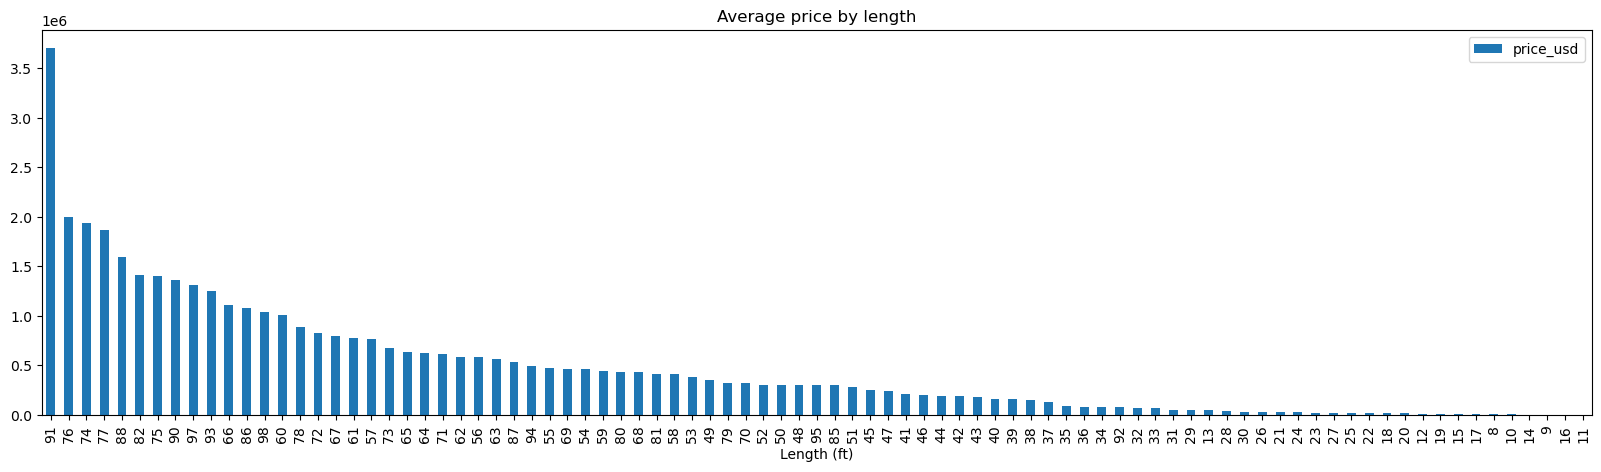

In [55]:
#Plot price by length
(data_price_means.reindex(index=data_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='bar', figsize=(20, 5), title='Average price by length'))
plt.xlabel('Length (ft)')